In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.328572824089476, 4.20607004111644, 1.35507551134795,
0.161608755204364, -5.42320349780782, -3.05851276224202, -0.0764172642034502,
-4.55218472276499, -0.902226297922731, -5.8609833528976, -1.05854090910473]

In [4]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_idx = [26, 76, 126, 176, 226, 276, 326, 376, 426, 476, 526]

In [5]:
alpha = 3
rho = 5.5
sigma = 2

In [6]:
model = CmdStanModel(stan_file='gaussian_process.stan')

data={'observed_idx':observed_idx,
       'x_predict':x_predict,
       'y_obs':y_obs,
       'N_obs':len(observed_idx),
       'N_predict':len(x_predict),
       'alpha':alpha,
       'rho':rho,
       'sigma':sigma}


INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
sample = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:09 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:12 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:15 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:16 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:19 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎ 


INFO:cmdstanpy:CmdStan done processing.


In [74]:
sample_pd=sample.draws_pd()
print(sample_pd.head())

      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -291.809       0.732950    0.240764          4.0          15.0          0.0   
1 -270.638       0.972774    0.240764          4.0          15.0          0.0   
2 -295.994       0.865987    0.240764          4.0          15.0          0.0   
3 -296.388       0.667272    0.240764          4.0          15.0          0.0   
4 -293.817       0.992280    0.240764          4.0          15.0          0.0   

   energy__  f_tilde[1]  f_tilde[2]  f_tilde[3]  ...  y_predict[542]  \
0   561.714   -0.361299    0.788172   -0.879677  ...       -1.432470   
1   549.907   -0.721995    0.738600   -0.474905  ...       -4.481990   
2   544.397    0.775489    1.291630    0.268338  ...       -3.109850   
3   592.499    0.371362    0.608027   -1.151180  ...       -0.745569   
4   578.177    0.736803    0.182519    0.601237  ...        0.913912   

   y_predict[543]  y_predict[544]  y_predict[545]  y_predict[546]  \
0       -0.

In [84]:
y_predict=sample.stan_variable('y_predict')
y_predict_pd=sample.draws_pd()
print(np.shape(y_predict))

(4000, 551)
[[-1.13128   0.912317 -2.65009  ... -2.68407   0.839697 -0.517722]
 [-3.95054   1.2324   -3.63109  ... -2.24733  -2.08045  -0.431143]
 [ 2.29627   2.49881   2.32774  ... -4.10685  -3.47771  -2.82592 ]
 ...
 [ 0.380121  0.703031  3.40339  ... -3.77124  -4.68869   0.48865 ]
 [ 4.10407   2.48354   4.14244  ... -3.88703  -2.74924  -0.981164]
 [ 1.56136   1.87575  -0.505463 ...  0.226789 -3.2282   -3.50125 ]]


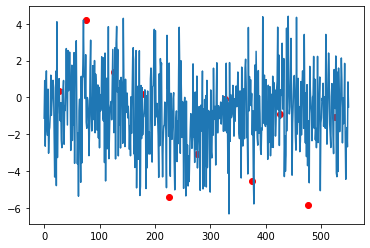

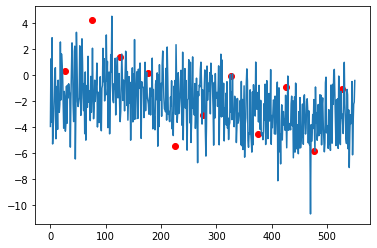

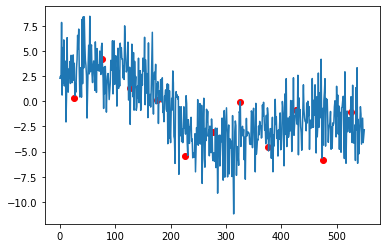

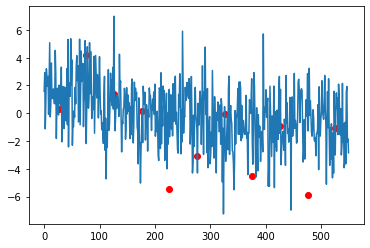

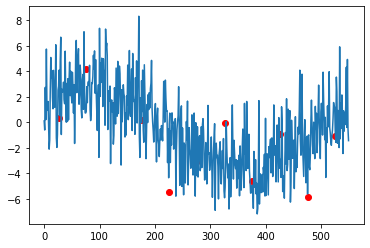

In [72]:
for i in range (0,5):
    plt.plot(y_predict[i])
    plt.scatter(observed_idx, y_obs, color='r')
    plt.show()


<ErrorbarContainer object of 3 artists>

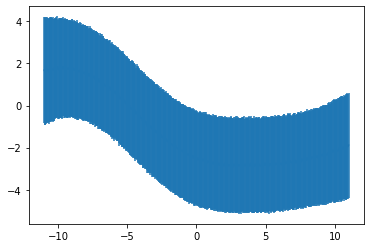

In [106]:
mean = []
stderr = []
for i in range (0,551):
    mean.append(np.mean(y_predict[:,i]))
    stderr.append(np.std(y_predict[:,i]))
plt.errorbar(x_predict,mean,yerr=stderr)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:04 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:09 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:17 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:20 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:24 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:27 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:29 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:32 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:36 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:40 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:45 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:49 Iteration: 1200 / 2000 [ 60


INFO:cmdstanpy:CmdStan done processing.


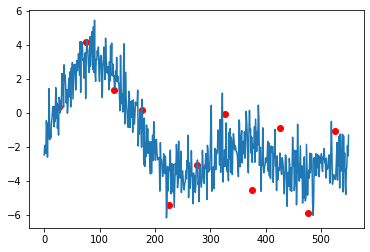

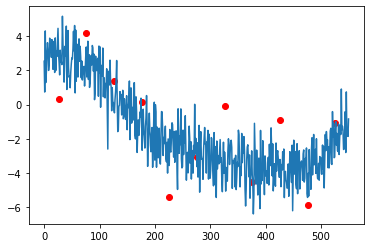

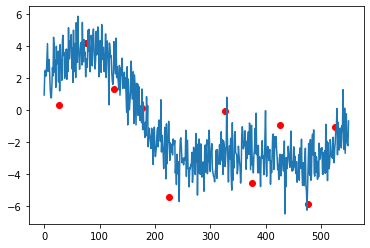

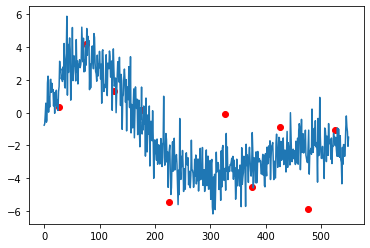

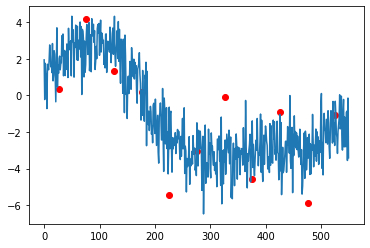

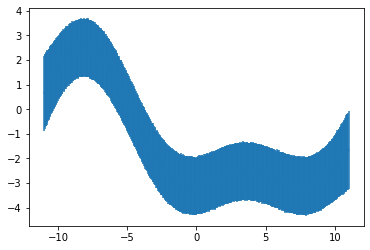

In [107]:
alpha = 5
rho = 5.5
sigma = 1

data={'observed_idx':observed_idx,
       'x_predict':x_predict,
       'y_obs':y_obs,
       'N_obs':len(observed_idx),
       'N_predict':len(x_predict),
       'alpha':alpha,
       'rho':rho,
       'sigma':sigma}

sample = model.sample(data=data, chains = 4)
sample_pd=sample.draws_pd()

y_predict=sample.stan_variable('y_predict')
y_predict_pd=sample.draws_pd()

for i in range (0,5):
    plt.plot(y_predict[i])
    plt.scatter(observed_idx, y_obs, color='r')
    plt.show()

mean = []
stderr = []
for i in range (0,551):
    mean.append(np.mean(y_predict[:,i]))
    stderr.append(np.std(y_predict[:,i]))
plt.errorbar(x_predict,mean,yerr=stderr)
plt.show()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:05 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:19 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:24 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:30 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:35 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:40 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:45 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:50 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:58 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 01:05 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 01:10 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 01:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 0


INFO:cmdstanpy:CmdStan done processing.


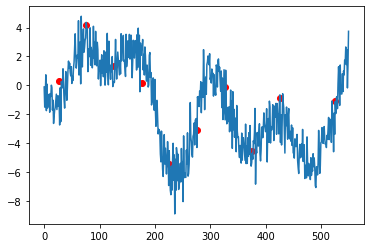

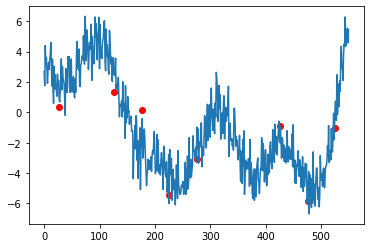

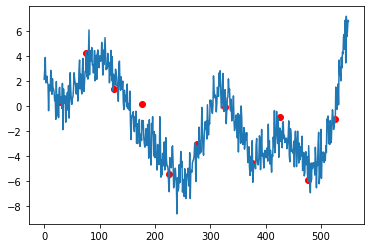

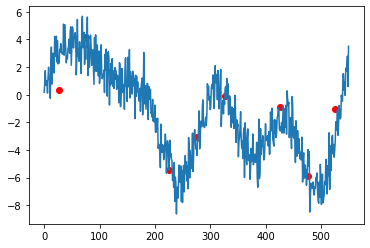

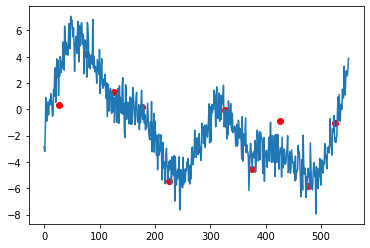

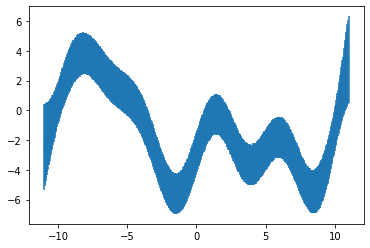

In [108]:
alpha = 10
rho = 2.5
sigma = 1

data={'observed_idx':observed_idx,
       'x_predict':x_predict,
       'y_obs':y_obs,
       'N_obs':len(observed_idx),
       'N_predict':len(x_predict),
       'alpha':alpha,
       'rho':rho,
       'sigma':sigma}

sample = model.sample(data=data, chains = 4)
sample_pd=sample.draws_pd()

y_predict=sample.stan_variable('y_predict')
y_predict_pd=sample.draws_pd()

for i in range (0,5):
    plt.plot(y_predict[i])
    plt.scatter(observed_idx, y_obs, color='r')
    plt.show()

mean = []
stderr = []
for i in range (0,551):
    mean.append(np.mean(y_predict[:,i]))
    stderr.append(np.std(y_predict[:,i]))
plt.errorbar(x_predict,mean,yerr=stderr)
plt.show()

TASK 2

In [115]:
model2 = CmdStanModel(stan_file='gaussian_process_optimize.stan')


INFO:cmdstanpy:compiling stan file D:\MATERIALY\VIII DATA ANALITYCS\Lab 6\gaussian_process_optimize.stan to exe file D:\MATERIALY\VIII DATA ANALITYCS\Lab 6\gaussian_process_optimize.exe
INFO:cmdstanpy:compiled model executable: D:\MATERIALY\VIII DATA ANALITYCS\Lab 6\gaussian_process_optimize.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/mjszo/AppData/Local/Temp/tmp03t438z2/tmp1mkald2_.hpp C:/Users/mjszo/AppData/Local/Temp/tmp03t438z2/tmp1mkald2_.stan
Warning in 'C:/Users/mjszo/AppData/Local/Temp/tmp03t438z2/tmp1mkald2_.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/mjszo/AppData/Local/Temp/tmp03t438z2/tmp1mkald2_.stan', line 14, column 30: cov_exp_quad
    is deprecated and will be removed in Stan 2.32.0. Use gp_exp

In [117]:
data={'x_obs':x_obs,
        'y_obs':y_obs,
        'N_obs':11}
result2 = model2.optimize(data=data, seed=5838298)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [119]:
rho = result2.stan_variable('rho')
alpha = result2.stan_variable('alpha')
sigma = result2.stan_variable('sigma')

1.13658


In [120]:
data={'observed_idx':observed_idx,
       'x_predict':x_predict,
       'y_obs':y_obs,
       'N_obs':len(observed_idx),
       'N_predict':len(x_predict),
       'alpha':alpha,
       'rho':rho,
       'sigma':sigma}

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:23 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:32 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:41 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:50 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:59 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 01:06 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 01:13 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 01:19 Iteration:  800 / 2000 [ 40%]  (Warmup)





chain 1 |█████     | 01:27 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 01:38 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 01:50 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 02:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎ 


INFO:cmdstanpy:CmdStan done processing.


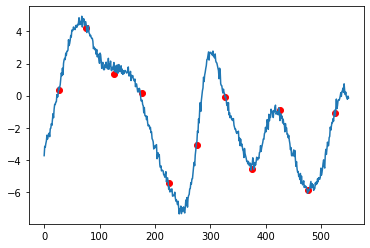

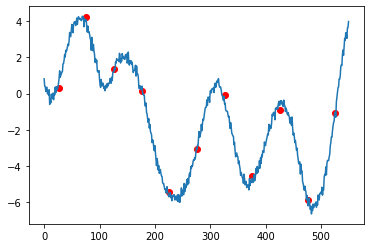

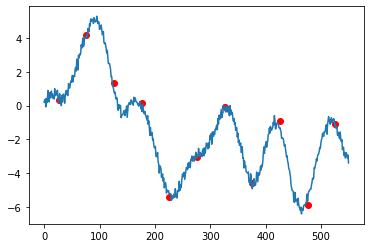

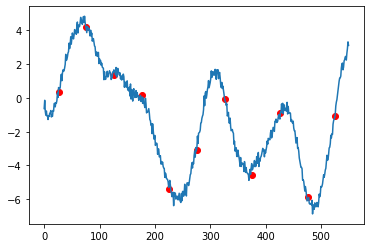

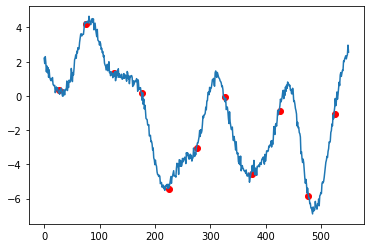

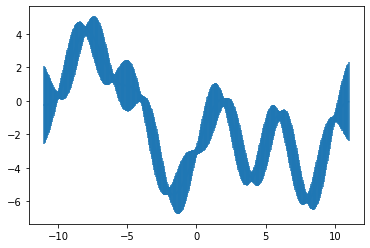

In [121]:
sample = model.sample(data=data, chains = 4)
sample_pd=sample.draws_pd()

y_predict=sample.stan_variable('y_predict')
y_predict_pd=sample.draws_pd()

for i in range (0,5):
    plt.plot(y_predict[i])
    plt.scatter(observed_idx, y_obs, color='r')
    plt.show()

mean = []
stderr = []
for i in range (0,551):
    mean.append(np.mean(y_predict[:,i]))
    stderr.append(np.std(y_predict[:,i]))
plt.errorbar(x_predict,mean,yerr=stderr)
plt.show()